In [ ]:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv("../data/Global_Cybersecurity_Threats_2015-2024.csv")
df.head(3)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20


In [ ]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

df.dtype

In [ ]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

### **Preparação dos Dados**

Utilização da tecnica de one hot encoding para os dados de texto

In [ ]:
# 1. Separando a variável alvo (y) e as features (X)
y = df["Financial Loss (in Million $)"]
X = df.drop(columns=["Financial Loss (in Million $)"], inplace=False)

In [ ]:
# 2. Definindo as colunas categóricas e numéricas
colunas_categoricas = [
   "Country",
   "Year",
   "Attack Type", 
   "Target Industry", 
   "Attack Source", 
   "Security Vulnerability Type", 
   "Defense Mechanism Used"
]
colunas_numericas = ["Number of Affected Users", "Incident Resolution Time (in Hours)"]

In [ ]:
preprocessador = ColumnTransformer(
    transformers=[  
        ('encoder_ohe', OneHotEncoder(sparse_output=False), colunas_categoricas),
        ('scaler', StandardScaler(), colunas_numericas)
    ],
    remainder='passthrough'
)

In [ ]:
X_processado = preprocessador.fit_transform(X)
X_processado

array([[ 0.        ,  0.        ,  1.        , ...,  1.        ,
         0.92614278,  1.2896175 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.71999376,  1.67858372],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.34912848, -0.80107593],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.79357099, -0.31486815],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.43025858, -1.33590448],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.081754  ,  1.33823828]], shape=(3000, 48))

In [ ]:
# Pegamos os nomes das colunas transformadas
nomes_colunas_processadas = (
    preprocessador.named_transformers_['encoder_ohe'].get_feature_names_out(colunas_categoricas).tolist() +
    colunas_numericas
)

print("Número de colunas originais:", len(X.columns))
print("Número de colunas processadas:", len(nomes_colunas_processadas))
print("Algumas das colunas", nomes_colunas_processadas[:10]) 

Número de colunas originais: 9
Número de colunas processadas: 48
Algumas das colunas ['Country_Australia', 'Country_Brazil', 'Country_China', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Japan', 'Country_Russia', 'Country_UK', 'Country_USA']


In [ ]:
X_processado_df = pd.DataFrame(X_processado, columns=nomes_colunas_processadas)
X_processado_df.head(3)

,Country_Australia,Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,Country_Japan,Country_Russia,Country_UK,Country_USA,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Attack Type_DDoS,Attack Type_Malware,Attack Type_Man-in-the-Middle,Attack Type_Phishing,Attack Type_Ransomware,Attack Type_SQL Injection,Target Industry_Banking,Target Industry_Education,Target Industry_Government,Target Industry_Healthcare,Target Industry_IT,Target Industry_Retail,Target Industry_Telecommunications,Attack Source_Hacker Group,Attack Source_Insider,Attack Source_Nation-state,Attack Source_Unknown,Security Vulnerability Type_Social Engineering,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_AI-based Detection,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN,Number of Affected Users,Incident Resolution Time (in Hours)
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.926143,1.289617
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.719994,1.678584
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.349128,-0.801076


### **Etapa de Treinamento**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processado, y, test_size=0.2, random_state=42)

print(f"\nConjunto de treino: {X_train.shape[0]} amostras")
print(f"Conjunto de teste: {X_test.shape[0]} amostras")


Conjunto de treino: 2400 amostras
Conjunto de teste: 600 amostras


In [ ]:
model_rlm = LinearRegression()

In [ ]:
model_rlm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = model_rlm.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\n--- Métricas de Avaliação ---")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")



--- Métricas de Avaliação ---
Erro Quadrático Médio (MSE): 815.90
Raiz do Erro Quadrático Médio (RMSE): 28.56
Coeficiente de Determinação (R²): -0.01


In [ ]:
print("\n--- Comparação entre Previsões e Valores Reais ---")
comparacao = pd.DataFrame({
    'Valor Real': y_test,
    'Previsão': y_pred
})

comparacao.head(10)


--- Comparação entre Previsões e Valores Reais ---


,Valor Real,Previsão
1801,82.04,54.965195
1190,41.67,46.282148
1817,88.63,47.960801
251,89.22,55.558574
2505,27.38,53.176381
1117,59.67,45.554992
1411,6.58,51.657650
2113,80.37,44.962088
408,70.88,50.470773
2579,68.83,56.962067


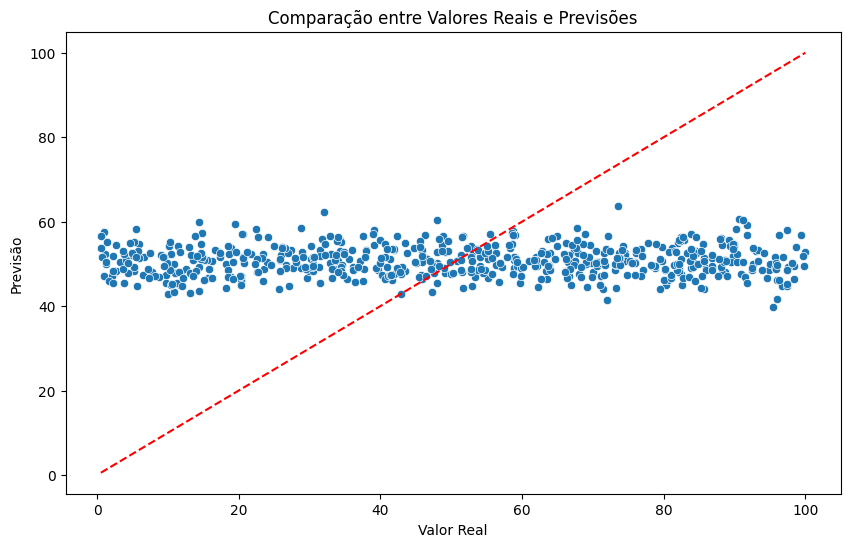

In [ ]:
# criando um grafico para comparação

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor Real', y='Previsão', data=comparacao)
plt.plot([comparacao['Valor Real'].min(), comparacao['Valor Real'].max()], [comparacao['Valor Real'].min(), comparacao['Valor Real'].max()], 'r--')  # Linha y=x
plt.title('Comparação entre Valores Reais e Previsões')
plt.xlabel('Valor Real')
plt.show()